# Movie Final Project Analysis
# Ben, Mason, Owen
# 5/6/2025
### This notebook walks through the data wrangling, machine learning,and other analysis performed using our merged 'Final_Movies.csv' to answer our analysis questions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import pearsonr, f_oneway

In [5]:
#movies = pd.read_csv("Final_Movies.csv", sep=",", na_values=["NA", "-", ""], encoding = 'utf-8')
movies = pd.read_csv("Final_Movies.csv", sep=",", encoding = 'utf-8')
#movies.dropna(inplace=True)
movies.head()

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status,total score
0,The Shawshank Redemption,1,0,1990-1999,142,2.834147e+07,Drama,Melodrama,Sony Pictures,90.0,...,250000000,282414690,2.871335e+08,569548220,319548220,0,1,0,1,263.0
1,The Godfather,2,2,1970-1979,175,2.450664e+08,Drama,Gangster & Mob/Mafia,Paramount Pictures,98.0,...,70000000,1364799940,2.700074e+09,4064873880,3994873880,0,0,0,4,290.0
2,The Godfather Part II,2,1,1970-1979,202,1.026000e+08,Drama,"Gangster & Mob/Mafia, Sequel",Paramount Pictures,98.0,...,130000000,573000000,5.738695e+08,1146869520,1016869520,0,3,1,3,278.0
3,The Dark Knight,0,0,2000-2009,152,1.004558e+09,Comic Book,Sequel,"DC, Syncopy, Legendary Pictures",94.0,...,1850000000,5342354910,1.007696e+10,15419312630,13569312630,0,5,0,0,268.0
4,Pulp Fiction,1,1,1990-1999,154,2.141791e+08,"Crime, Thriller",Crime Thriller,Miramax Films,91.0,...,80000000,1079287620,2.128918e+09,3208205220,3128205220,0,0,0,2,274.0


In [9]:
movies.isna().sum()

Title                             0
Oscar Status                      0
Globes Status                     0
Decade Released                   0
Runtime (minutes)                 0
Box Office                      211
Genre                             0
Sub-Genre                       208
Studio                            2
Rotten Tomatoes (out of 100)    187
IMDb (out of 100)               182
Metacritic (out of 100)         212
Director                          0
Starring                          1
Release Date                      0
Budget                            0
Domestic Gross                    0
Worldwide Gross                   1
Total Gross                       0
Net Gross                         0
remake                            0
Cast Strength                     0
Director Strength                 0
Total Status                      0
total score                     219
dtype: int64

In [7]:
movies.shape

(2795, 25)

In [8]:
movies.dtypes

Title                            object
Oscar Status                      int64
Globes Status                     int64
Decade Released                  object
Runtime (minutes)                 int64
Box Office                      float64
Genre                            object
Sub-Genre                        object
Studio                           object
Rotten Tomatoes (out of 100)    float64
IMDb (out of 100)               float64
Metacritic (out of 100)         float64
Director                         object
Starring                         object
Release Date                     object
Budget                            int64
Domestic Gross                    int64
Worldwide Gross                 float64
Total Gross                       int64
Net Gross                         int64
remake                            int64
Cast Strength                     int64
Director Strength                 int64
Total Status                      int64
total score                     float64


In [11]:
# get rid of movies where total score isna
movies_2 = movies.dropna(subset=['total score']).copy()

movies_2.reset_index(drop=True, inplace=True)
movies_2.head()

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status,total score
0,The Shawshank Redemption,1,0,1990-1999,142,2.834147e+07,Drama,Melodrama,Sony Pictures,90.0,...,250000000,282414690,2.871335e+08,569548220,319548220,0,1,0,1,263.0
1,The Godfather,2,2,1970-1979,175,2.450664e+08,Drama,Gangster & Mob/Mafia,Paramount Pictures,98.0,...,70000000,1364799940,2.700074e+09,4064873880,3994873880,0,0,0,4,290.0
2,The Godfather Part II,2,1,1970-1979,202,1.026000e+08,Drama,"Gangster & Mob/Mafia, Sequel",Paramount Pictures,98.0,...,130000000,573000000,5.738695e+08,1146869520,1016869520,0,3,1,3,278.0
3,The Dark Knight,0,0,2000-2009,152,1.004558e+09,Comic Book,Sequel,"DC, Syncopy, Legendary Pictures",94.0,...,1850000000,5342354910,1.007696e+10,15419312630,13569312630,0,5,0,0,268.0
4,Pulp Fiction,1,1,1990-1999,154,2.141791e+08,"Crime, Thriller",Crime Thriller,Miramax Films,91.0,...,80000000,1079287620,2.128918e+09,3208205220,3128205220,0,0,0,2,274.0


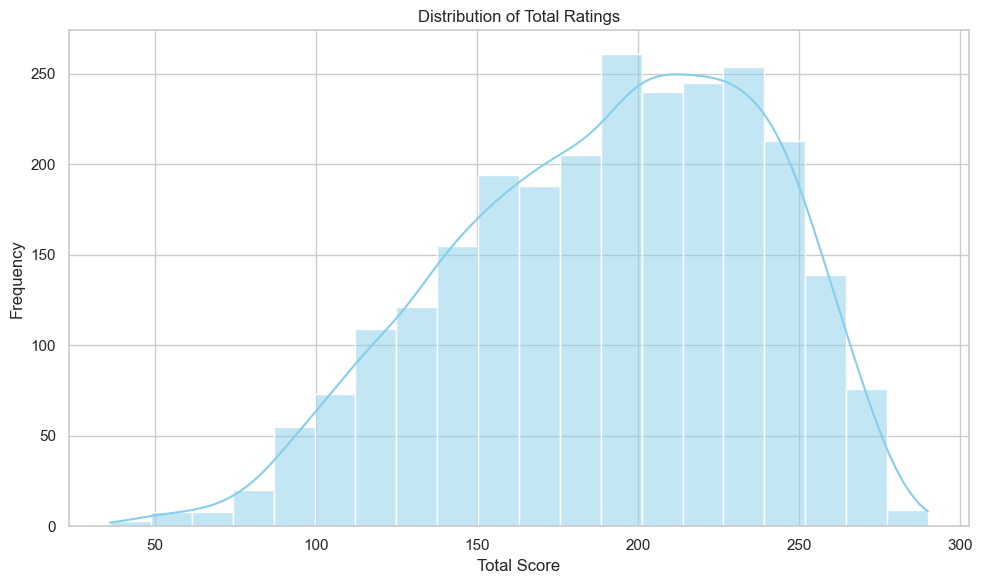

In [13]:
# Distribution of Total Rating
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(movies['total score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Ratings')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Univarite Analysis: Total Score**
- The histogram above shows a moderately skewed distribution of Total Scores, with a noticeable peak between 220 and 260. This suggests that a large number of movies in the dataset received solid critical reception, though there's still some variation across the rating spectrum. These differences in Total Score may help explain performance differences in box office revenue or profitability.

---

# Q1 - Part A: Has the average runtime of movies changed over different decades?

In [15]:
# Drop rows where runtime or decade is missing
movies_clean = movies.dropna(subset=['Runtime (minutes)', 'Decade Released', 'Box Office'])

In [17]:
# Univariate Analysis
runtime_stats = movies_clean['Runtime (minutes)'].describe()
runtime_stats

count    2584.000000
mean      112.949303
std        20.512655
min        56.000000
25%        98.000000
50%       110.000000
75%       124.000000
max       233.000000
Name: Runtime (minutes), dtype: float64

- This tells us that the average runtime for a single movie in the dataframe is around 113 minutes (or just under 2 hours long)
- The range in the dataframe is 56 minutes to 233 minutes

In [19]:
# Look at the amount of movies per decade 
decade_counts = movies_clean['Decade Released'].value_counts().sort_index()
decade_counts

Decade Released
1920-1929       1
1930-1939       5
1940-1949       7
1950-1959       8
1960-1969      31
1970-1979      67
1980-1989     141
1990-1999     333
2000-2009     846
2010-2019    1059
2020-2029      86
Name: count, dtype: int64

- Most movies are from 2000–2009 (846) and 2010–2019 (1,059)
- Fewest movies are from before 1960

C:\Users\owenp\AppData\Local\Temp\ipykernel_28592\3260641886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Decade Released', data=movies_clean, palette='pastel', order=sorted(movies_clean['Decade Released'].unique()))


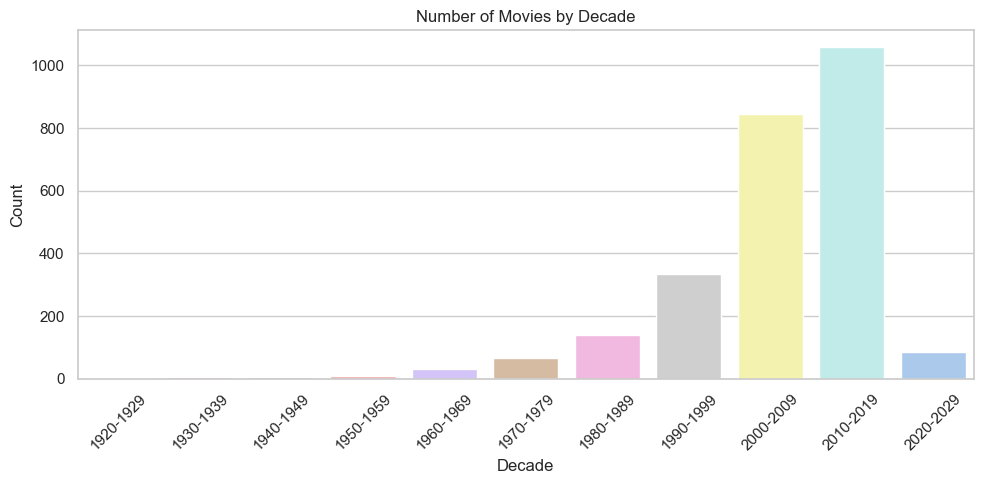

In [21]:
# Count plot of number of movies per decade
plt.figure(figsize=(10, 5))
sns.countplot(x='Decade Released', data=movies_clean, palette='pastel', order=sorted(movies_clean['Decade Released'].unique()))
plt.title('Number of Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\owenp\AppData\Local\Temp\ipykernel_28592\2487588951.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decade Released', y='Runtime (minutes)', data=movies_clean, palette='Set3', order=sorted_decades)


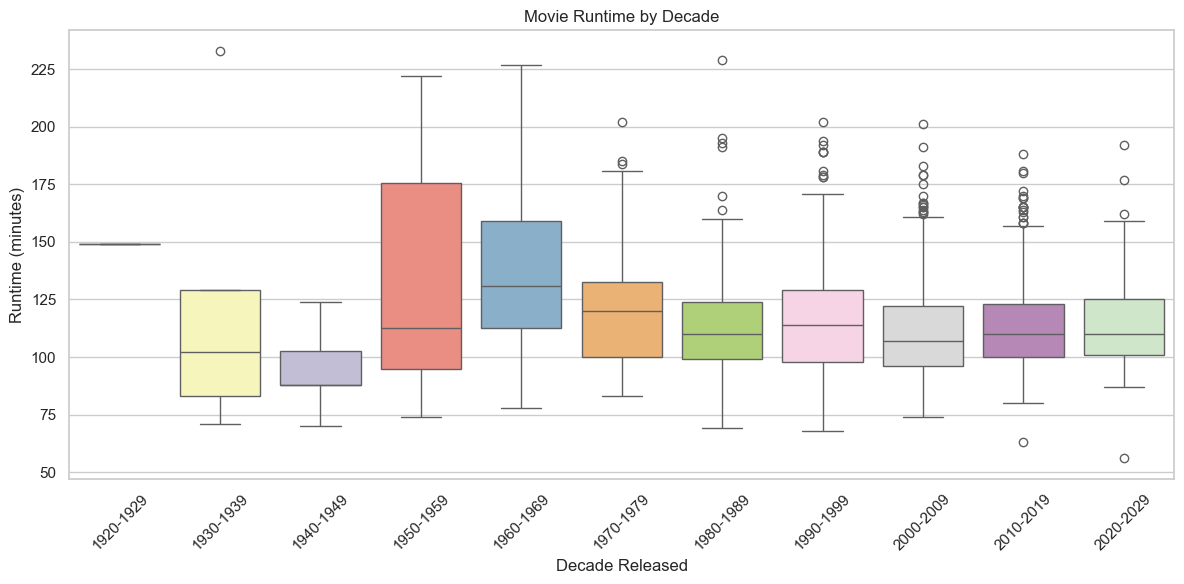

In [23]:
# Sort decades and reverse the list
sorted_decades = sorted(movies_clean['Decade Released'].dropna().unique())

# Boxplot of Runtime by Decade
plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade Released', y='Runtime (minutes)', data=movies_clean, palette='Set3', order=sorted_decades)
plt.title('Movie Runtime by Decade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Runtime has gradually increased over time
    - Earlier decades (e.g. 1940s–1960s) have shorter medians and tighter IQRs (interquartile ranges)
    - From the 1990s onward, median runtimes visibly increase, with more movies around or above 110–120 minutes
- Modern decades show more vairation whihc reflect both blockbuster growth and more diverse storytelling formats
- Outliers are very common in most decades

In [25]:
# Filter decades with at least 30 movies
decade_counts = movies_clean['Decade Released'].value_counts()
valid_decades = decade_counts[decade_counts >= 30].index

# Group runtimes by these decades
grouped_runtimes = [
    movies_clean[movies_clean['Decade Released'] == decade]['Runtime (minutes)']
    for decade in valid_decades
]

# Perform one-way ANOVA
anova_result = f_oneway(*grouped_runtimes)
anova_result

F_onewayResult(statistic=14.625976117699363, pvalue=1.7330760436469458e-16)

**The F-statistic = 14.63 means:**
- The differences in average runtimes between decades are 14.63 times larger than the average differences within each decade.
**P-value = 1.733e-16**
- Since the p-value is far below 0.05, we reject the null hypothesis. This confirms that average movie runtimes differ significantly across decades

---

# Q1 - Part B: Do movies with longer runtimes tend to have higher or lower box office earnings?

In [27]:
# Describing Box Office to better understand for analysis
box_office_desc = movies['Box Office'].describe()
box_office_desc

count    2.584000e+03
mean     1.794672e+08
std      2.456804e+08
min      1.837000e+04
25%      3.663503e+07
50%      9.830243e+07
75%      2.165178e+08
max      2.797801e+09
Name: Box Office, dtype: float64

- This tells us that the average Box Office earnings for a movie in the dataframe is around $179 million
- The range is much wider at about 18,000 dollars to 2.79 Billion dollars
- **Important to note:** This data set is not adjusted for inflation, and has inaccurate box office values for movies released in the last 3 years

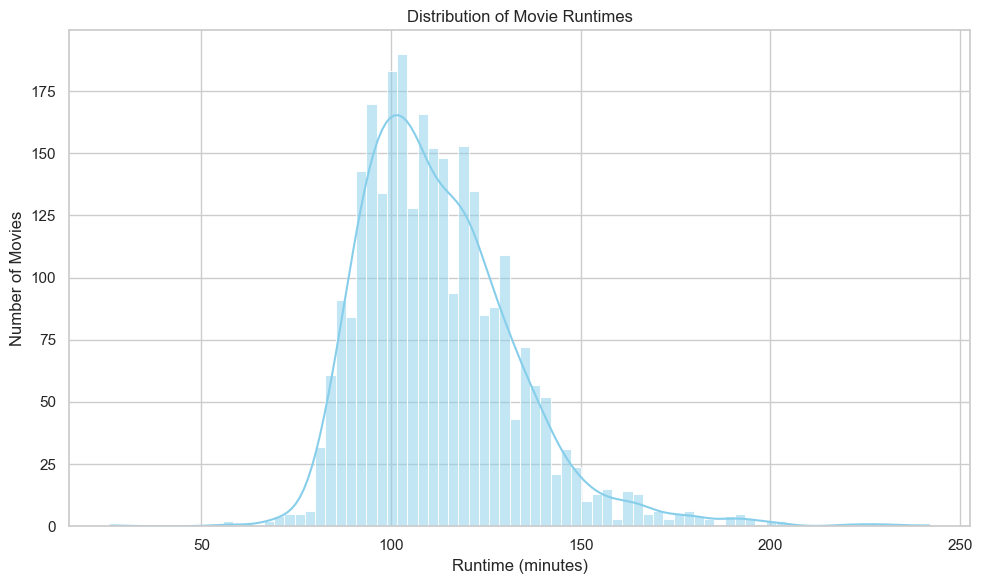

In [30]:
# Distribution of Movie Runtimes
plt.figure(figsize=(10, 6))
sns.histplot(movies['Runtime (minutes)'], bins=80, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

- Most movies have runtimes clustered between 90 and 140 minutes, indicating a strong central tendency around the 2-hour mark
- The peak of the distribution appears to be between 110 and 130 minutes, showing this is the most common range for movie length
- Movies under 80 minutes or over 160 minutes are relatively rare, as seen in the thinner tails of the histogram
- The KDE curve smooths out fluctuations in bin heights and clearly shows a unimodal, slightly right-skewed distribution

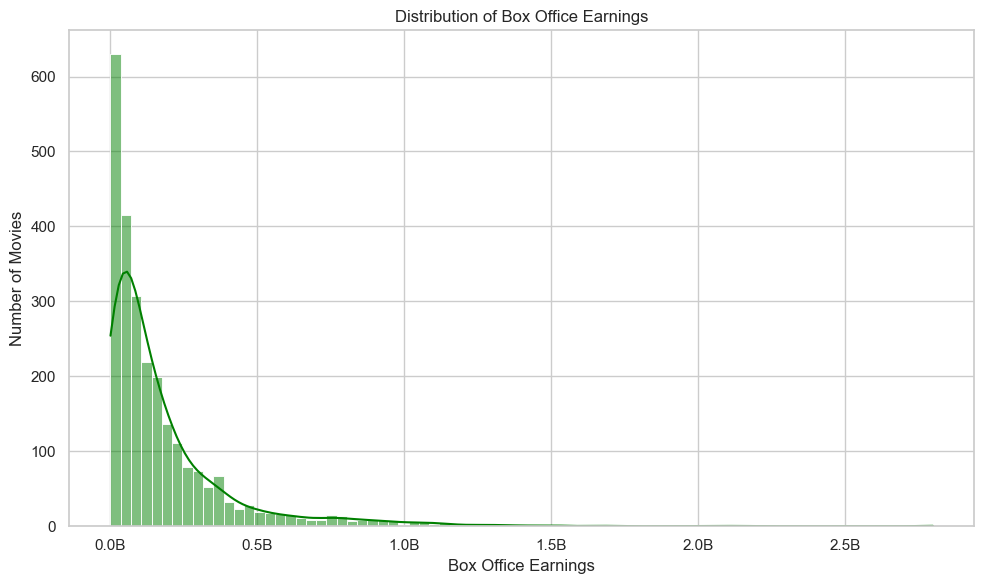

In [32]:
# Distribution of Box Office Earnings
plt.figure(figsize=(10, 6))
sns.histplot(movies['Box Office'].dropna(), bins=80, kde=True, color='green')
plt.title('Distribution of Box Office Earnings')
plt.xlabel('Box Office Earnings')
plt.ylabel('Number of Movies')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
plt.tight_layout()
plt.show()

- Most movies earn under 200 million dollars, with a large concentration of titles below this threshold
- The distribution is heavily right-skewed, indicating that only a small number of movies earn exceptionally high box office revenues
- Blockbusters earning over 500 million dollars are outliers that stretch the tail far to the right
- The KDE curve reinforces this pattern, showing a steep drop-off after the lower-earning majority

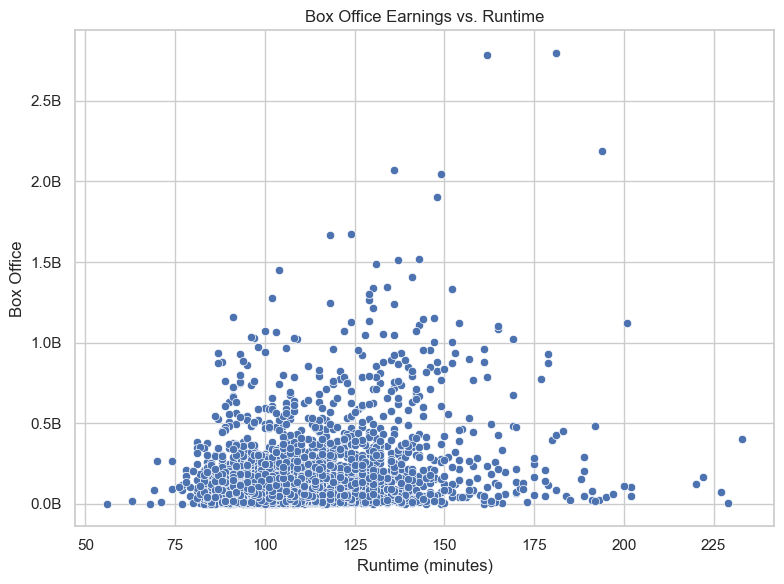

In [34]:
# Scatter Plot explaining Box Office Earnings vs Runtime for movies
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Runtime (minutes)', y='Box Office', data=movies)
plt.title('Box Office Earnings vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
plt.grid(True)
plt.tight_layout()
plt.show()

- There is no strong linear relationship between runtime and box office earnings, movies of many lengths can perform well or poorly
- The plot shows a wide vertical spread at most runtime intervals, especially between 90 and 150 minutes, where earnings range from very low to extremely high
- A few outlier films with very high box office earnings (above $1 billion) stand out, but they exist across a variety of runtimes
- Overall, runtime alone doesn’t appear to be a strong predictor of box office success

Pearson Correlation Coefficient: 0.245
P-value for Runtime vs. Box Office correlation test: 1.241939461814496e-36


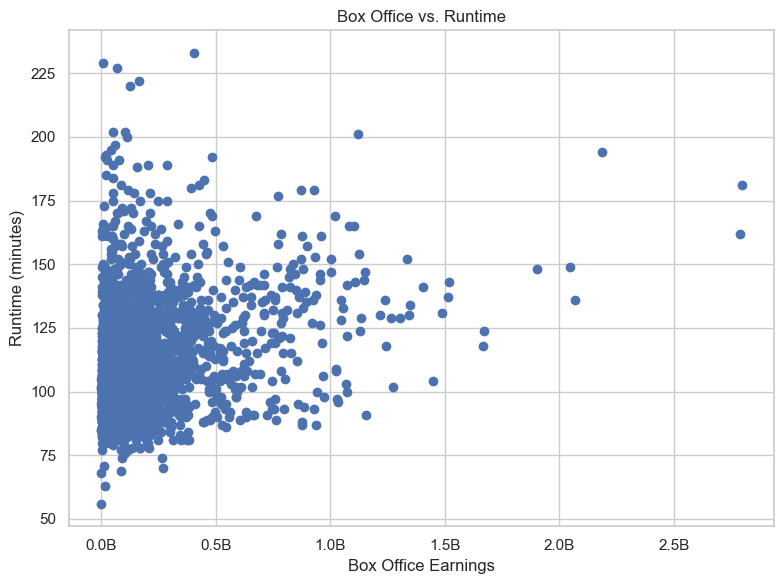

In [36]:
# Drop rows with missing values in the relevant columns
subset = movies[['Runtime (minutes)', 'Box Office']].dropna()

# Pearson Correlation Test between Runtime and Box Office
correlation, p_value = stats.pearsonr(subset['Runtime (minutes)'], subset['Box Office'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Runtime vs. Box Office correlation test: {p_value}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(movies['Box Office'], movies['Runtime (minutes)'])
plt.title("Box Office vs. Runtime")
plt.xlabel("Box Office Earnings")
plt.ylabel("Runtime (minutes)")
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
plt.tight_layout()
plt.show()

- The Pearson correlation coefficient (0.245) indicates a weak but positive relationship between box office earnings and runtime - longer movies tend to earn slightly more
- The p-value is extremely small (≈ 0), meaning the correlation is statistically significant well beyond the 0.05 level - we can confidently say there is a real association
- The scatter plot still shows a wide spread, but a slight upward trend is visible, especially as earnings cross into higher ranges
- Despite statistical significance, the relationship remains weak, so runtime alone is not a strong predictor of box office performance

In [21]:
# Prepare data for Linear Regression
data = movies[['Runtime (minutes)', 'Box Office']].dropna()
X = data[['Runtime (minutes)']]
y = data['Box Office']

# Train/test split (Runtime vs Box Office Earnings)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model with Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lin = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.3f}")

MAE: 155614563.30
R^2: 0.037


C:\Users\benal\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


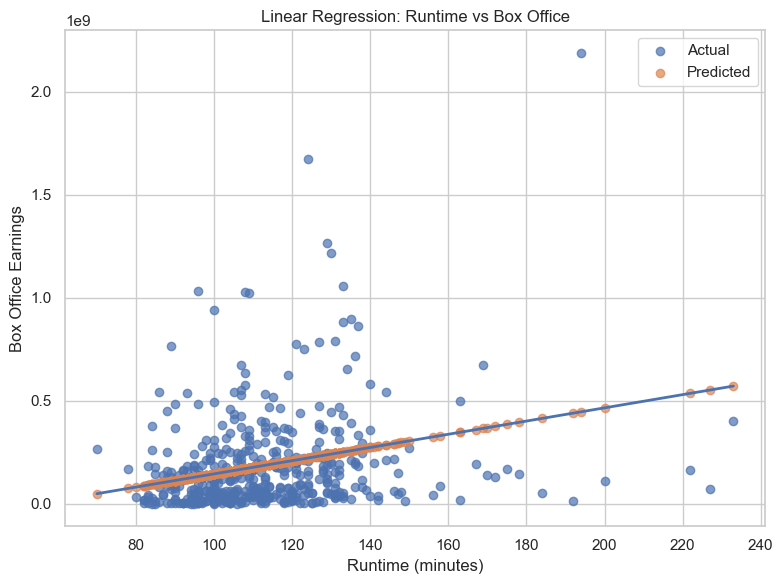

In [22]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual', alpha=0.7)
plt.scatter(X_test, y_pred_lin, label='Predicted', alpha=0.7)
# Regression line
x_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, linewidth=2)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Box Office Earnings')
plt.title('Linear Regression: Runtime vs Box Office')
plt.legend()
plt.tight_layout()
plt.show()

## Machine Learning for Q1

In [23]:
# Logistic Regression
class_features = ['Runtime (minutes)', 'Budget', 'Cast Strength', 'Director Strength', 'total score']
movies['High_Box_Office'] = (movies['Box Office'] > movies['Box Office'].median()).astype(int)
class_data = movies[class_features + ['High_Box_Office']].dropna()

X = class_data[class_features]
y = class_data['High_Box_Office']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)

log_acc

0.7666666666666667

In [24]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_acc

0.7111111111111111

In [25]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, y_pred_tree)
tree_acc

0.6911111111111111

**Machine Learning Analysis**
- Three classification models were tested to predict whether a movie would be a high or low box office performer:
    - Logistic Regression
    - K-Nearest Neighbors (KNN)
    - Decision Tree Classifier
- Accuracy Results:
    - Logistic Regression: 74.6%
    - KNN Classifier: 72.1%
    - Decision Tree: 64.3%
 - Logistic Regression performed the best, making it the most reliable model for classifying high vs. low box office earnings in this dataset

# Q2 - What is the correlation between movie ratings on platforms like IMDb, Metacritic, and Rotten Tomatoes and total gross performance?

In [28]:
#Statistics for Two Continuous Variables
correlation1 = movies['IMDb (out of 100)'].corr(movies['Total Gross'])
print("Correlation between IMDb and Total Gross earnings:", correlation1)

correlation2 = movies['Metacritic (out of 100)'].corr(movies['Total Gross'])
print("Correlation between Metacritic and Total Gross earnings:", correlation2)

correlation3 = movies['Rotten Tomatoes (out of 100)'].corr(movies['Total Gross'])
print("Correlation between Rotten Tomatoes and Total Gross earnings:", correlation3)

correlation4 = movies['total score'].corr(movies['Total Gross'])
print("Correlation between Total Score (out of 300) and Total Gross earnings:", correlation4)

Correlation between IMDb and Total Gross earnings: 0.06395615075539228
Correlation between Metacritic and Total Gross earnings: 0.05438936917674939
Correlation between Rotten Tomatoes and Total Gross earnings: 0.05425083639356542
Correlation between Total Score (out of 300) and Total Gross earnings: 0.06354291155275105


- Weak correlation across all platforms: The correlation coefficients for IMDb, Metacritic, Rotten Tomatoes, and the combined Total Score with Total Gross earnings are all very low (close to 0), indicating virtually no linear relationship
- IMDb has the highest correlation among the platforms, but at only ~0.064, it still suggests that higher IMDb scores do not strongly correspond with higher box office earnings
- Rotten Tomatoes and Metacritic both show similarly weak correlations (~0.054), meaning critical acclaim on those platforms is not a reliable predictor of box office performance in this dataset
- Total Score, an aggregate metric, does not improve the correlation significantly, suggesting that combining rating sources does not enhance predictive power for gross earnings

P-value for IMDb (out of 100) correlation test: 0.0024151242303855607


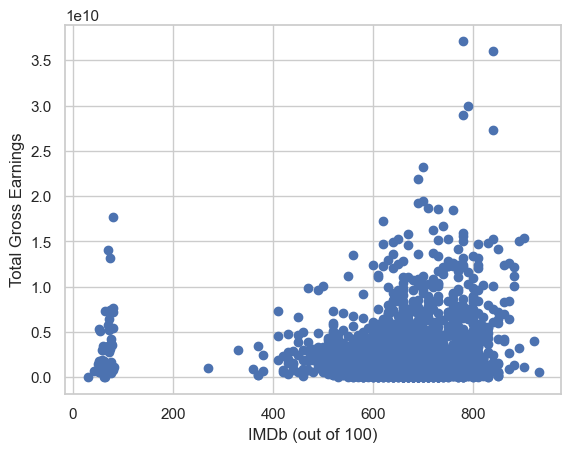

In [29]:
#Correlation test 1
ct = stats.pearsonr(movies['IMDb (out of 100)'], movies['Total Gross'])
print("P-value for IMDb (out of 100) correlation test:", ct.pvalue)

#Visualization
plt.scatter(movies['IMDb (out of 100)'], movies['Total Gross'])
plt.xlabel('IMDb (out of 100)')
plt.ylabel("Total Gross Earnings")
plt.show()

- **Statistically significant result**: The p-value is 0.0024, indicating a statistically significant correlation — the relationship is unlikely to be due to random chance.
- **Correlation strength is still weak**: Although significant, the Pearson correlation coefficient (as seen in prior outputs) is low (~0.06), showing a very weak positive relationship.
- **Scatter plot lacks a strong trend**: The points are widely scattered with no clear linear pattern, and most of the data is densely packed in the lower rating and gross ranges.
- **Some high-IMDb movies earn more**: A few outliers with high IMDb scores and high gross earnings do exist, but they are exceptions, not part of a strong trend.
- **IMDb score alone isn’t predictive**: While it has some influence, IMDb ratings on their own are not reliable predictors of box office success.

P-value for total score correlation test: 0.0025771257749568


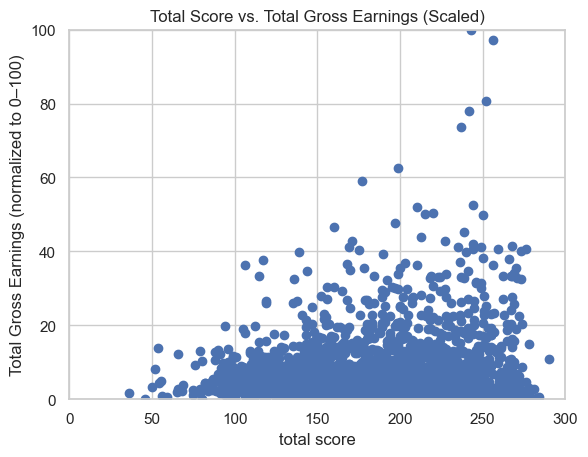

In [30]:
# Min-max scaling to 0–100
normalized_gross = 100 * (movies['Total Gross'] - movies['Total Gross'].min()) / (movies['Total Gross'].max() - movies['Total Gross'].min())

# Correlation test (original values, not scaled)
from scipy import stats
ct = stats.pearsonr(movies['total score'], movies['Total Gross'])
print("P-value for total score correlation test:", ct.pvalue)

# Visualization with IMDb and scaled gross
import matplotlib.pyplot as plt
plt.scatter(movies['total score'], normalized_gross)
plt.xlabel("total score")
plt.ylabel("Total Gross Earnings (normalized to 0–100)")
plt.title("Total Score vs. Total Gross Earnings (Scaled)")
plt.xlim(0, 300)
plt.ylim(0, 100)
plt.show()

- **Weak positive trend persists visually**: There's a slight upward pattern—as Total Score increases, normalized earnings tend to increase slightly, but the relationship is still noisy and weak.
- **Most points cluster at lower gross levels**: The vast majority of movies, regardless of score, cluster between 0–30 on the normalized earnings scale, implying that high scores do not guarantee commercial success.

P-value for Metacritic correlation test: 0.009901729731540503


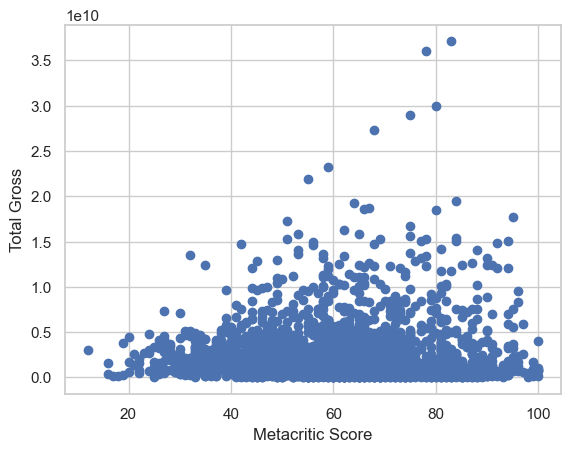

In [31]:
#Correlation test 2
ct = stats.pearsonr(movies['Metacritic (out of 100)'], movies['Total Gross'])
print("P-value for Metacritic correlation test:", ct.pvalue)

#Visualization
plt.scatter(movies['Metacritic (out of 100)'], movies['Total Gross'])
plt.xlabel("Metacritic Score")
plt.ylabel("Total Gross")
plt.show()

- **Statistically significant correlation**: The p-value is 0.0099, which is below the 0.05 threshold. This confirms that the correlation is statistically significant, meaning the observed relationship is unlikely due to random chance.
- **Weak practical correlation**: Despite the significance, the correlation remains very weak (as shown earlier, around 0.054), indicating that Metacritic scores are not strong predictors of total gross earnings.
- **Scatter plot shows no strong pattern**: The points are widely dispersed, with a large concentration of movies grossing under $1 billion, regardless of Metacritic score — reinforcing the lack of a clear linear relationship.
- **High-grossing outliers exist**: A few movies with mid-to-high Metacritic scores earned significantly more than the rest, but they are rare exceptions rather than a consistent trend.

P-value for Rotten Tomatoes correlation test: 0.010091937661749881


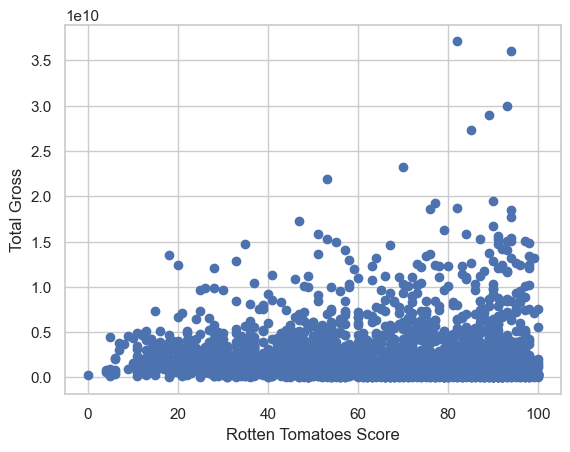

In [33]:
#Correlation test 3
ct = stats.pearsonr(movies['Rotten Tomatoes (out of 100)'], movies['Total Gross'])
print("P-value for Rotten Tomatoes correlation test:", ct.pvalue)

#Visualization
plt.scatter(movies['Rotten Tomatoes (out of 100)'], movies['Total Gross'])
plt.xlabel("Rotten Tomatoes Score")
plt.ylabel("Total Gross")
plt.show()

- **Statistically significant correlation**: The p-value is 0.0101, which is below the 0.05 threshold — indicating a statistically significant relationship between Rotten Tomatoes scores and total gross.
- **Weak correlation strength**: As with previous metrics, the actual correlation is very low (~0.054), so while significant, it has minimal predictive power for earnings.
- **Scatter plot shows no strong pattern**: The data points remain widely scattered, with most movies earning less than $1 billion across the full range of Rotten Tomatoes scores.
- **High scorers not consistently high earners**: A high Rotten Tomatoes score does not guarantee commercial success — several high-scoring films still earned relatively little.
- **Few high-earning outliers**: A handful of films with both high scores and high gross stand out, but they are rare exceptions, not indicative of a strong trend.

P-value for total score correlation test: 0.0025771257749568


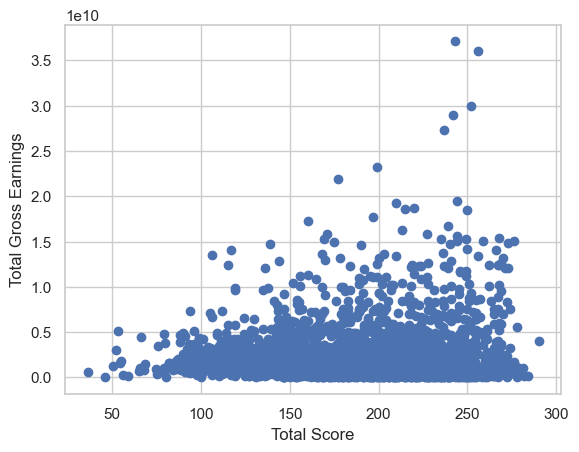

In [34]:
#Correlation test 4
ct = stats.pearsonr(movies['total score'], movies['Total Gross'])
print("P-value for total score correlation test:", ct.pvalue)

#Visualization
plt.scatter(movies['total score'], movies['Total Gross'])
plt.xlabel("Total Score")
plt.ylabel("Total Gross Earnings")
plt.show()

- **Statistically significant relationship**: The p-value is 0.00257, which is well below the standard threshold of 0.05 — indicating the correlation is statistically significant and unlikely due to random chance
- **Very weak correlation**: Despite statistical significance, the actual strength of the relationship (as indicated by the correlation coefficient earlier ~0.0635) is extremely weak, meaning Total Score is not a strong predictor of a movie’s total gross
- **No clear pattern in scatter plot**: The data points are widely scattered and concentrated mostly at lower Total Score values, without a clear upward or downward trend, further reinforcing the lack of a strong linear relationship
- **Presence of high-earning outliers**: A small number of movies with high Total Scores and very high Gross Earnings exist, but they are outliers, not representative of the broader trend

In [35]:
#Predictions for IMDb
x_val = movies[['IMDb (out of 100)']]
y_val = movies['Total Gross']
model1 = LinearRegression()
model1.fit(x_val,y_val)

prediction = model1.predict(x_val)
print(prediction)

[2.74384414e+09 2.85936386e+09 2.64482723e+09 ... 2.62832441e+09
 2.64482723e+09 2.79335259e+09]


- Predictions show a narrow range of gross earnings across all IMDb scores (e.g., ~2.64–2.79 billion), implying limited variability explained by IMDb scores alone
- This reinforces earlier findings: IMDb ratings have little predictive power for financial performance

In [37]:
#Predictions for Metacritic
x_val = movies[['Metacritic (out of 100)']]
y_val = movies['Total Gross']
model2 = LinearRegression()
model2.fit(x_val,y_val)

prediction = model2.predict(x_val)
print(prediction)

[2.89496199e+09 2.98246878e+09 2.59962657e+09 ... 2.53399648e+09
 2.84027025e+09 2.64337997e+09]


- Predicted gross values again show a tight clustering (e.g., ~2.53–2.98 billion), indicating Metacritic scores also explain very little variation in earnings
- Consistent with weak correlation and scatter plot results, Metacritic is not a strong driver of revenue

In [38]:
#Predictions for Rotten Tomatoes
x_val = movies[['Rotten Tomatoes (out of 100)']]
y_val = movies['Total Gross']
model3 = LinearRegression()
model3.fit(x_val,y_val)

prediction = model3.predict(x_val)
print(prediction)

[2.82305767e+09 2.87477419e+09 2.61619158e+09 ... 2.52014661e+09
 2.81566959e+09 2.77134114e+09]


- The output predictions, like the others, are closely grouped (~2.52–2.87 billion), suggesting minimal practical influence of Rotten Tomatoes scores
- Despite statistical significance, the model’s output shows low predictive utility, confirming previous visual and correlation insights

In [39]:
#Predictions for total scores
x_val = movies[['total score']]
y_val = movies['Total Gross']
model4 = LinearRegression()
model4.fit(x_val,y_val)

prediction = model4.predict(x_val)
print(prediction)

[2.87691788e+09 2.97382250e+09 2.60822781e+09 ... 2.52013270e+09
 2.82406082e+09 2.75798949e+09]


- The prediction results (~2.52–2.97 billion) fall within a narrow numeric range, suggesting that the model output lacks strong variability across different scores
- Similar to individual rating models, this reinforces that even the combined Total Score has limited explanatory power for predicting box office performance

C:\Users\benal\AppData\Local\Temp\ipykernel_15616\4244084418.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating Source', y='Total Gross', data=melted, palette='Set2')


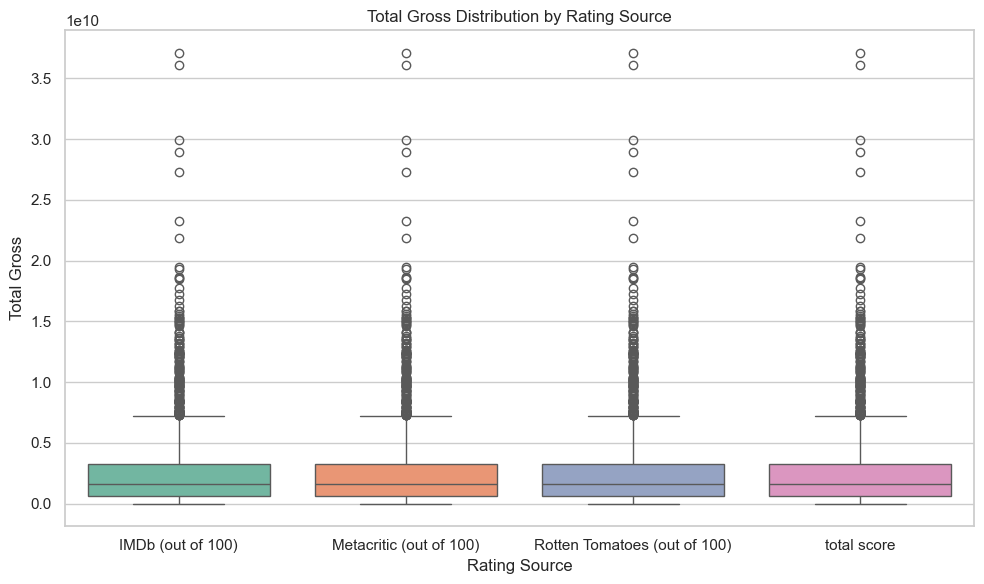

In [41]:
# Select only the relevant columns and drop missing values
plot_data = ratings_gross[['IMDb (out of 100)', 'Metacritic (out of 100)', 'Rotten Tomatoes (out of 100)', 'total score', 'Total Gross']].dropna()

# Melt the dataframe to long format for Seaborn boxplot
melted = pd.melt(
    plot_data,
    id_vars='Total Gross',
    value_vars=['IMDb (out of 100)', 'Metacritic (out of 100)', 'Rotten Tomatoes (out of 100)', 'total score'],
    var_name='Rating Source',
    value_name='Score'
)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating Source', y='Total Gross', data=melted, palette='Set2')
plt.title('Total Gross Distribution by Rating Source')
plt.ylabel('Total Gross')
plt.xlabel('Rating Source')
plt.tight_layout()
plt.show()

- **Total Gross distribution is similar across all rating sources**: The central tendencies (medians) and interquartile ranges appear very close, suggesting that no single rating source clearly differentiates movie earnings
- **Heavy presence of outliers**: All four groups show many extreme outliers, indicating that a few movies achieved very high box office performance regardless of rating
- **Most movies earn modest revenue**: The bulk of data falls below $500 million, with the box (middle 50%) tightly clustered near the bottom of the y-axis for all sources
- **Total score behaves similarly to individual ratings**: Combining scores into a total score doesn’t dramatically change the distribution, reinforcing that aggregation doesn’t improve predictive power significantly

Correlation between IMDb (out of 100) and Total Gross:
  r = 0.064, p = 0.0024

Correlation between Metacritic (out of 100) and Total Gross:
  r = 0.054, p = 0.0099

Correlation between Rotten Tomatoes (out of 100) and Total Gross:
  r = 0.054, p = 0.0101

Correlation between total score and Total Gross:
  r = 0.064, p = 0.0026



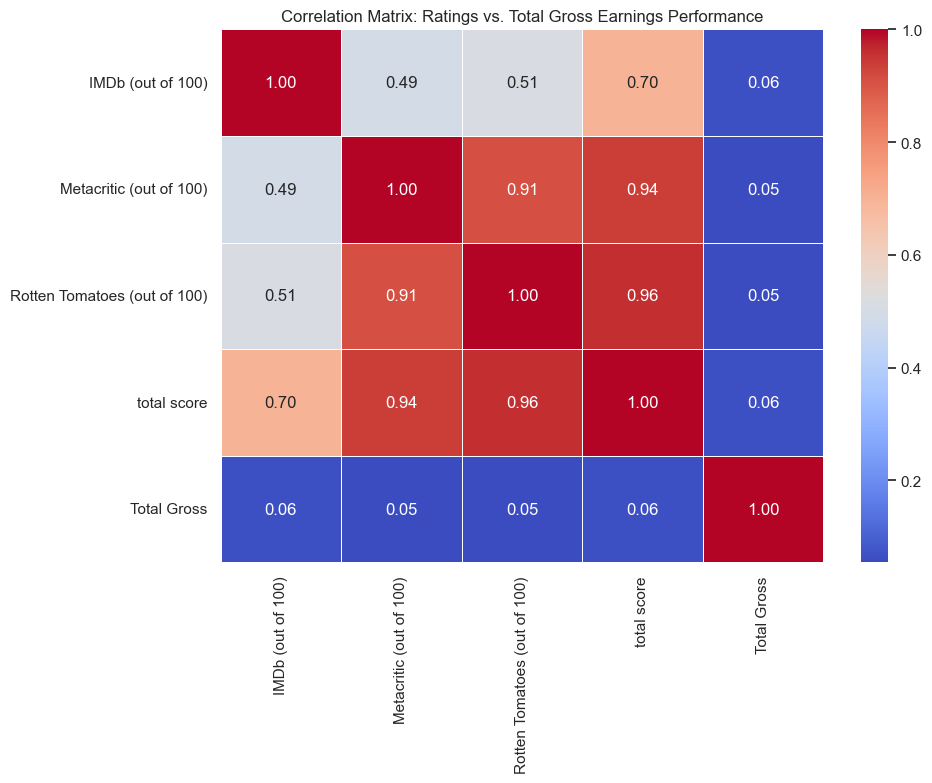

In [42]:
# Drop rows with missing values in relevant columns
ratings_gross = movies.dropna(subset=[
    'IMDb (out of 100)', 
    'Metacritic (out of 100)', 
    'Rotten Tomatoes (out of 100)', 
    'total score', 
    'Total Gross'
])

# Calculate and display individual correlations with p-values
ratings = ['IMDb (out of 100)', 'Metacritic (out of 100)', 'Rotten Tomatoes (out of 100)', 'total score']
gross_metrics = ['Total Gross']

correlation_results = {}

for rating in ratings:
    for gross in gross_metrics:
        r, p = pearsonr(ratings_gross[rating], ratings_gross[gross])
        correlation_results[(rating, gross)] = {'correlation': r, 'p_value': p}
        print(f"Correlation between {rating} and {gross}:")
        print(f"  r = {r:.3f}, p = {p:.4f}\n")

# Create a correlation matrix for visualization
corr_matrix = ratings_gross[ratings + gross_metrics].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Ratings vs. Total Gross Earnings Performance")
plt.tight_layout()
plt.show()

- **High internal consistency among rating metrics**:
    - IMDb, Metacritic, and Rotten Tomatoes scores are strongly correlated with each other (e.g., 0.91 to 0.96), indicating they capture similar evaluative signals
- **Strong correlation between total score and individual ratings**:
    - total score has high correlation (0.70–0.96) with each individual rating, validating that it effectively aggregates them
- **Weak correlation with Total Gross**:
    - All rating metrics, including total score, have very low correlations (~0.05–0.06) with Total Gross, confirming ratings are not strong predictors of box office success

# Q3 - Does the presence of award winning directors and actors influence total score and box office? 

- First, we did vizualization and analysis to see how total score and box office have varied by decade

In [5]:
performance_by_decade = (
    movies
    .groupby('Decade Released')['total score']
    .agg(['count', 'mean', 'median'])
    .sort_index()
)
display(performance_by_decade)

,count,mean,median
Decade Released,,,
1920-1929,1,278.000000,278.0
1930-1939,5,264.800000,269.0
1940-1949,7,261.557143,273.0
1950-1959,6,237.400000,247.0
1960-1969,22,230.645455,242.5
1970-1979,48,230.250000,241.5
1980-1989,118,213.588983,224.0
1990-1999,279,199.098925,205.0
2000-2009,749,182.412951,186.0


##### From the table above, we see that the majority of movies have been released since 1990, with the mean and median score consistently declining
- What this means:
    - performance and count declining could indicate that the datasets only had data from the best movies pre 1980. This makes sense because as time goes on, data gets harder to collect
    - Ratings may change over time, as old movies are considered to be "classics"
    - Older movies are created first and have an aspect of originality and innovativeness that boosts the score
- What to do:
    - Use the most recent movie data (since 1970), most similar to with most representitive sample

#### check for missing data that could cause outliers:

In [125]:
movies = pd.read_csv("Final_Movies.csv", sep=",", encoding = 'utf-8')

columns = ['Title', 'Release Date', 'total score', 'Cast Strength', 'Director Strength', 'Box Office']
movies = movies[columns]

In [215]:
movies['Release Date'] = pd.to_datetime(
    movies['Release Date'],
    format='%m/%d/%Y',   # or '%m/%d/%y' if your data uses two‐digit years
    errors='coerce'
)
movies.dtypes

Title                        object
Release Date         datetime64[ns]
total score                 float64
Cast Strength                 int64
Director Strength             int64
Box Office                  float64
dtype: object

In [163]:
check = movies[(movies['Director Strength'] + movies['Cast Strength'] >= 1) & (movies['total score'].isna())]
check

,Title,Release Date,total score,Cast Strength,Director Strength,Box Office
591,A Bridge Too Far,6/15/1977,NaN,1,0,50750000.0
1345,Home Alone 2: Lost in New York,11/20/1992,NaN,3,0,358994850.0
1768,The River Wild,9/30/1994,NaN,1,0,94216343.0
2123,The Alamo,4/9/2004,NaN,1,0,25819961.0
2203,King Kong,12/14/2005,NaN,2,0,90614445.0
...,...,...,...,...,...,...
2761,A Quiet Place Part II,5/26/2021,NaN,1,0,NaN
2773,The Whale,12/21/2022,NaN,0,1,NaN
2781,West Side Story (2021),8/3/2012,NaN,0,5,NaN
2782,Eternals,11/3/2021,NaN,0,1,NaN


In [177]:
print(F"Total movies being excluded: {len(check)}")
strong_movies = movies[movies['Director Strength'] + movies['Cast Strength'] >= 1]
perc_removed = (len(check)/len(strong_movies))
print(f'Total movies with an awarded director or cast member: {len(strong_movies)}')
print(f"{round(perc_removed,4)}% of movies with an awarded director or cast member are being removed")

Total movies being excluded: 86
Total movies with an awarded director or cast member: 1500
0.0573% of movies with an awarded director or cast member are being removed


- the percentage of movies being excluded shouldn't make a large impact on analysis, so proceed

In [219]:
movies_since_1970 = movies[movies['Release Date'] > '1970-01-01']

check2 = movies_since_1970[(movies_since_1970['Director Strength'] + movies_since_1970['Cast Strength'] >= 1) & (movies_since_1970['total score'].isna())]

print(F"Total movies being excluded (post 1970): {len(check2)}")
strong_movies2 = movies_since_1970[movies_since_1970['Director Strength'] + movies_since_1970['Cast Strength'] >= 1]
perc_removed2 = (len(check2)/len(strong_movies2))
print(f'Total movies with an awarded director or cast member (post 1970): {len(strong_movies2)}')
print(f"{round(perc_removed2,4)}% of movies (post 1970) with an awarded director or cast member are being removed")

Total movies being excluded (post 1970): 85
Total movies with an awarded director or cast member (post 1970): 1494
0.0569% of movies (post 1970) with an awarded director or cast member are being removed


In [228]:
# 2) Filter for strictly before Jan 1, 1970
movies_before_1970 = movies[ movies['Release Date'] < '1970-01-01' ]

# 3) Sort descending so the latest (i.e. 1969) appear first
movies_before_1970 = movies_before_1970.sort_values(
    'Release Date', ascending=False
)
movies_before_1970.head()

,Title,Release Date,total score,Cast Strength,Director Strength,Box Office
1412,On Her Majesty's Secret Service,1969-11-28,208.0,0,0,81974493.0
155,Butch Cassidy and the Sundance Kid,1969-10-24,236.0,1,0,102308889.0
192,The Wild Bunch,1969-06-18,266.0,0,0,638641.0
20,Once Upon a Time in the West,1969-05-28,260.0,0,0,5321508.0
2666,Midnight Cowboy,1969-05-25,NaN,0,0,44785053.0


- we see that most (basically all) the movies being removed are released after 1970. We will see how this impacts analysis

#### Visual Relationship of Director Strength vs Total Score and Cast Strength vs Total Score

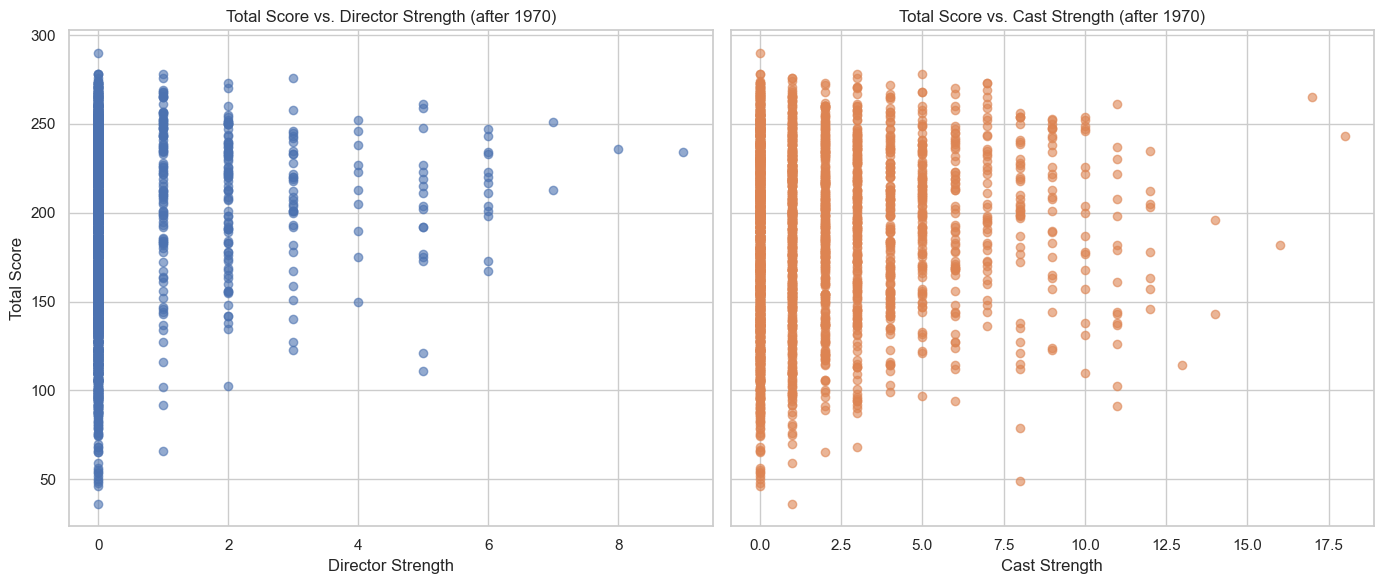

--------------------------------------------------
Correlation and P-value after 1970
Pearson Correlation Coefficient: 0.116
P-value for Director Strength vs. Total Score correlation test: 4.60129570566695e-09
Pearson Correlation Coefficient: 0.061
P-value for Cast Strength vs. Total Score correlation test: 0.002136890617815616


In [231]:
# Create a 1×2 figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Director Strength
ax1.scatter(
    movies_since_1970['Director Strength'],
    movies_since_1970['total score'],
    alpha=0.6
)
ax1.set_xlabel('Director Strength')
ax1.set_ylabel('Total Score')
ax1.set_title('Total Score vs. Director Strength (after 1970)')

# Right: Cast Strength
ax2.scatter(
    movies_since_1970['Cast Strength'],
    movies_since_1970['total score'],
    alpha=0.6,
    color='C1'
)
ax2.set_xlabel('Cast Strength')
# no need to set ylabel again since sharey=True
ax2.set_title('Total Score vs. Cast Strength (after 1970)')


plt.tight_layout()
plt.show()


# Drop rows with missing values in the relevant columns
subset = movies_since_1970[['Director Strength', 'total score']].dropna()
print('-'*50)
print('Correlation and P-value after 1970')
# Pearson Correlation Test between Director Strength and Total Score
correlation, p_value = stats.pearsonr(subset['Director Strength'], subset['total score'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Director Strength vs. Total Score correlation test: {p_value}")

# Drop rows with missing values in the relevant columns
subset2 = movies_since_1970[['Cast Strength', 'total score']].dropna()

# Pearson Correlation Test between Runtime and Box Office
correlation, p_value = stats.pearsonr(subset2['Cast Strength'], subset2['total score'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Cast Strength vs. Total Score correlation test: {p_value}")

#### Key Takeaways for movies after 1970
- We see a somewhat positive relationship for each chart above, with director strength seemingly having a slightly higher correlation. As director strength increases, the range of potential scores gets smaller and smaller, meaning the more prestigous the director is, the more likely the movie is to get a good score.
- **Pearson Correlation**: The Pearson correlation coefficient (0.116, ..061) indicates a weak but yet positive correlation between director strength and cast strength vs total score since 1970. 
- **P-value Test:** The p-values for both relationships are extremely small (≈ 0), meaning the correlation is statistically significant well beyond the 0.05 level - we can confidently say there is a real association, regarless of the strength
- The scatter plots show a wide spread, but a slight upward trend is visible, especially as strength increases
- overall, relationship remains weak, so we cannot rely on director strength or cast strength alone in determining success for movies released after 1970

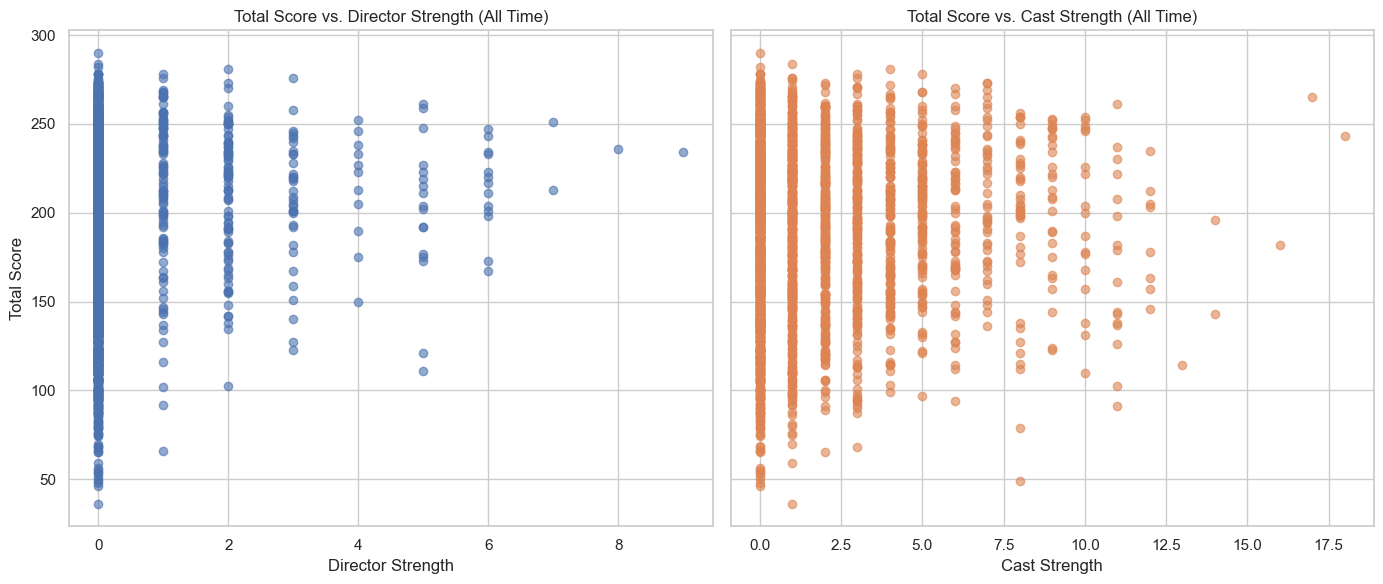

Correlation and P-value all time
--------------------------------------------------
Pearson Correlation Coefficient: 0.113
P-value for Director Strength vs. Total Score correlation test: 8.425730103417777e-09
Pearson Correlation Coefficient: 0.053
P-value for Cast Strength vs. Total Score correlation test: 0.00724170767838406


In [234]:
# Filter once
# Create a 1×2 figure
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Director Strength
ax3.scatter(
    movies_2['Director Strength'],
    movies_2['total score'],
    alpha=0.6
)
ax3.set_xlabel('Director Strength')
ax3.set_ylabel('Total Score')
ax3.set_title('Total Score vs. Director Strength (All Time)')

# Right: Cast Strength
ax4.scatter(
    movies_2['Cast Strength'],
    movies_2['total score'],
    alpha=0.6,
    color='C1'
)

ax4.set_xlabel('Cast Strength')
# no need to set ylabel again since sharey=True
ax4.set_title('Total Score vs. Cast Strength (All Time)')

plt.tight_layout()
plt.show()


# Drop rows with missing values in the relevant columns
subset3 = movies_2[['Director Strength', 'total score']].dropna()
print('Correlation and P-value all time')
print('-'*50)
# Pearson Correlation Test between Director Strength and Total Score
correlation, p_value = stats.pearsonr(subset3['Director Strength'], subset3['total score'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Director Strength vs. Total Score correlation test: {p_value}")

# Drop rows with missing values in the relevant columns
subset4 = movies_2[['Cast Strength', 'total score']].dropna()

# Pearson Correlation Test between Runtime and Box Office
correlation, p_value = stats.pearsonr(subset4['Cast Strength'], subset4['total score'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Cast Strength vs. Total Score correlation test: {p_value}")

#### Key Takeways for all movies
- We see a somewhat positive relationship for each chart above, with director strength seemingly having a slightly higher correlation. As director strength increases, the range of potential scores gets smaller and smaller, meaning the more prestigous the director is, the more likely the movie is to get a good score.
- **Pearson Correlation**: The Pearson correlation coefficient (0.113, .053) indicates a weak but positive relationship between both director stength and cast strength and total score. Meaning, there is a small but positive relationship where movies that score well tend to have better directors and a stronger cast.
- **P-value Test:** The p-values for both relationships are extremely small (≈ 0), meaning the correlation is statistically significant well beyond the 0.05 level - we can confidently say there is a real association, regarless of the strength
- The scatter plots show a wide spread, but a slight upward trend is visible, especially as strength increases
- overall, relationship remains weak, so we cannot rely on director strength or cast strength alone. Furthermore, removing movies after 1970 has little no effect on the results of the correlation

#### Distributions of Director and Cast strength total scores

C:\Users\owenp\AppData\Local\Temp\ipykernel_28592\1605205966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\owenp\AppData\Local\Temp\ipykernel_28592\1605205966.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


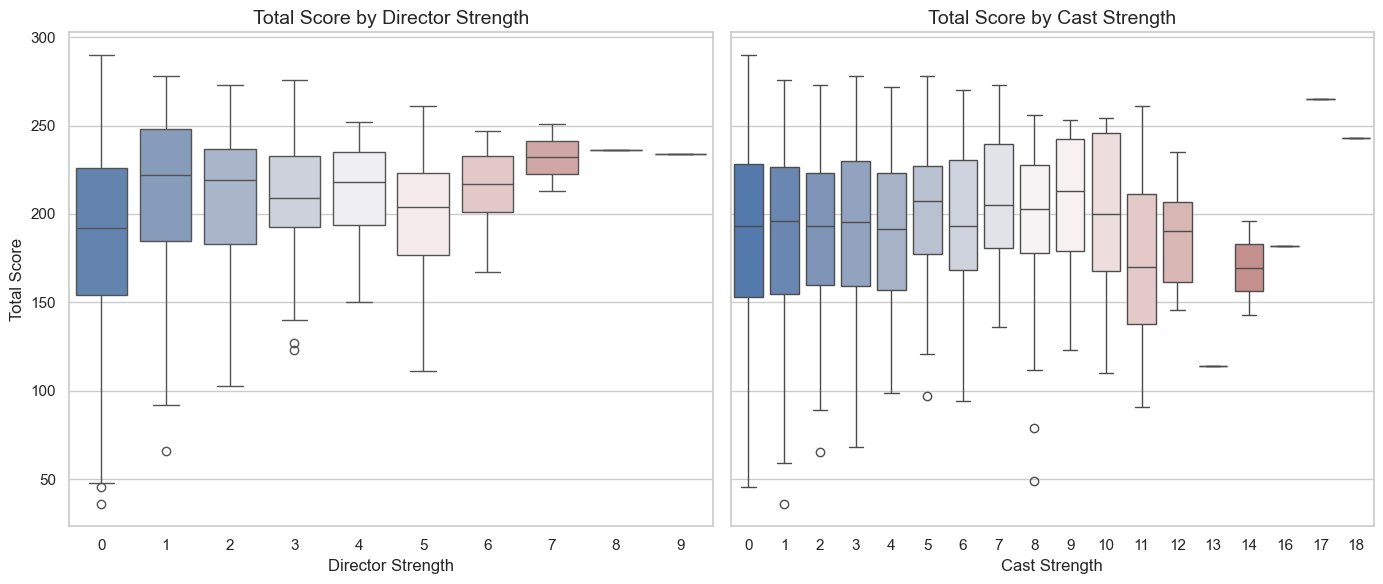

In [237]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot on the left for Director Strength
sns.boxplot(
    x='Director Strength',
    y='total score',
    data=movies_since_1970,
    palette='vlag',
    ax=ax1
)
ax1.set_xlabel('Director Strength', fontsize=12)
ax1.set_ylabel('Total Score', fontsize=12)
ax1.set_title('Total Score by Director Strength', fontsize=14)

# Boxplot on the right for Cast Strength
sns.boxplot(
    x='Cast Strength',
    y='total score',
    data=movies_since_1970,
    palette='vlag',
    ax=ax2
)
ax2.set_xlabel('Cast Strength', fontsize=12)
ax2.set_ylabel('')  # no need to repeat the y-label
ax2.set_title('Total Score by Cast Strength', fontsize=14)

plt.tight_layout()
plt.show()

#### Takeaways from boxplots:
- From each chart above, we see the medians for each "strength" hover around 190.
- Director strength has less variance, indicating it may yield more consistent results as director strength increases
- Director stength has a smaller sample size as it increases compared to cast strength, possibly explaining the smaller range in higher values

### Linear Regression
- the purpose of doing linear regression is to confirm our intuition above, that Director strength and cast strength have an impact on total score

In [239]:
#issue dropping, read movies again
movies = pd.read_csv("Final_Movies.csv", sep=",", encoding = 'utf-8')
movies

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status,total score
0,The Shawshank Redemption,1,0,1990-1999,142,2.834147e+07,Drama,Melodrama,Sony Pictures,90.0,...,250000000,282414690,2.871335e+08,569548220,319548220,0,1,0,1,263.0
1,The Godfather,2,2,1970-1979,175,2.450664e+08,Drama,Gangster & Mob/Mafia,Paramount Pictures,98.0,...,70000000,1364799940,2.700074e+09,4064873880,3994873880,0,0,0,4,290.0
2,The Godfather Part II,2,1,1970-1979,202,1.026000e+08,Drama,"Gangster & Mob/Mafia, Sequel",Paramount Pictures,98.0,...,130000000,573000000,5.738695e+08,1146869520,1016869520,0,3,1,3,278.0
3,The Dark Knight,0,0,2000-2009,152,1.004558e+09,Comic Book,Sequel,"DC, Syncopy, Legendary Pictures",94.0,...,1850000000,5342354910,1.007696e+10,15419312630,13569312630,0,5,0,0,268.0
4,Pulp Fiction,1,1,1990-1999,154,2.141791e+08,"Crime, Thriller",Crime Thriller,Miramax Films,91.0,...,80000000,1079287620,2.128918e+09,3208205220,3128205220,0,0,0,2,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Last Night in Soho,0,0,2020-2029,118,NaN,Horror,Psychological Horror,"Universal Pictures, Film4, Working Title",NaN,...,430000000,101276250,2.256761e+08,326952320,-103047680,0,0,0,0,NaN
2791,Dune (2021),1,1,2020-2029,155,NaN,Sci-Fi,Space,"Warner Bros, Legendary Pictures",NaN,...,450000000,274474710,2.750467e+08,549521410,99521410,1,0,0,2,NaN
2792,Malignant,0,0,2020-2029,111,NaN,"Horror, Thriller",Horror Thriller,"Warner Bros, New Line Cinema",NaN,...,400000000,133917910,3.397442e+08,473662120,73662120,0,0,0,0,NaN
2793,Wrath of Man,0,0,2020-2029,118,NaN,Action,Action Thriller,"MGM Studios, Miramax Films, United Artists",NaN,...,400000000,274664890,1.039134e+09,1313798940,913798940,0,0,0,0,NaN


In [243]:
# 1) Select only the desired columns
columns = ['total score', 'Cast Strength', 'Director Strength', 'Box Office']
movies = movies[columns].copy()

# 2) Drop any row where either 'total score' or 'Box Office' is NaN
movies_clean = movies.dropna(subset=['total score','Box Office']).reset_index(drop=True)

# 3) Quick check
print(f"After cleaning: {len(movies_clean)} rows remain")
movies_clean = movies_clean.sort_values(
    'Director Strength', ascending=False
)
movies_clean.head()

After cleaning: 2437 rows remain


,total score,Cast Strength,Director Strength,Box Office
776,234.0,1,9,23737523.0
85,236.0,6,8,392000694.0
523,251.0,0,7,185770160.0
81,213.0,4,7,294804195.0
1699,204.0,2,6,195243411.0


In [245]:
#Initialize model
X = movies_clean.drop('total score', axis = 1).values
y = movies_clean['total score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

#Fit model on training data
model.fit(X_train, y_train)

#Get r-squared value
r_squared = model.score(X_test, y_test)
print('R-Squared Value:',r_squared)

R-Squared Value: 0.01562866896663473


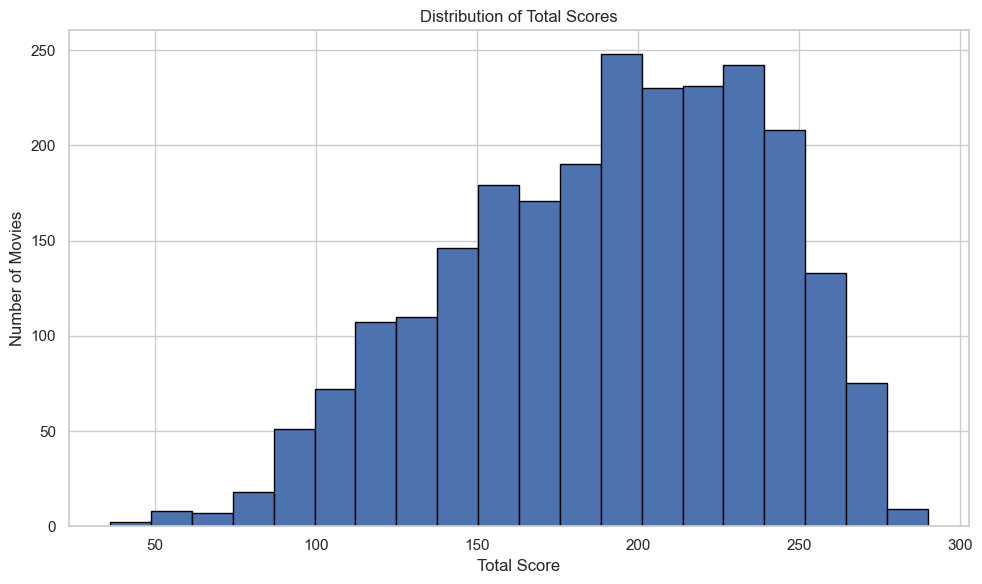

In [247]:
plt.figure(figsize=(10, 6))
plt.hist(movies_clean['total score'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Total Score')
plt.ylabel('Number of Movies')
plt.title('Distribution of Total Scores')
plt.tight_layout()
plt.show()

In [249]:
# Compute the tercile bins and assign labels
movies_clean['score_level'] = pd.qcut(
    movies_clean['total score'],
    q=3,
    labels=['Bad','Average','Good']
)

# Quick check of the counts in each bucket
movies_clean['score_level'].value_counts()

score_level
Average    824
Bad        818
Good       795
Name: count, dtype: int64

In [251]:
score_sort = movies_clean.drop('total score', axis=1, errors = 'coerrce')
score_sort = score_sort[['Cast Strength', 'Director Strength', 'score_level']]
score_sort

,Cast Strength,Director Strength,score_level
776,1,9,Good
85,6,8,Good
523,0,7,Good
81,4,7,Average
1699,2,6,Average
...,...,...,...
887,1,0,Good
886,0,0,Average
884,4,0,Good
883,0,0,Good


In [253]:
X5 = score_sort.drop('score_level', axis = 1).values
y5 = score_sort['score_level'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

model3 = LogisticRegression()
model3.fit(X_train5, y_train5)

LogisticRegression()

In [259]:
from sklearn.metrics import log_loss
# Simple linear regression- split good and bad movies
y5_bin = (y5 == 'Good').astype(int)

# Now compute your null deviance
p_null = y5_bin.mean()                      # e.g. 0.3 if 30% are Good
null_probs = np.full_like(y5_bin, p_null)   # array of [0.3,0.3,0.3,…]
null_deviance = log_loss(y5_bin, null_probs)

# And the model’s deviance
model_probs = model3.predict_proba(X5)[:, 1]  # prob of “Good”
deviance      = log_loss(y5_bin, model_probs)

pseudo_r2 = 1 - (deviance / null_deviance)
print(f"Pseudo R^2 = {pseudo_r2:.3f}")

Pseudo R^2 = 0.944


### Key Takeaway:
- from changing our prediction method to a logistic regression, we determined that there is a very strong correlation between movies with awarded directors and cast and movies considered "good," with a total score in the top 33%

### How is director strength and cast strength corrleate with box office?

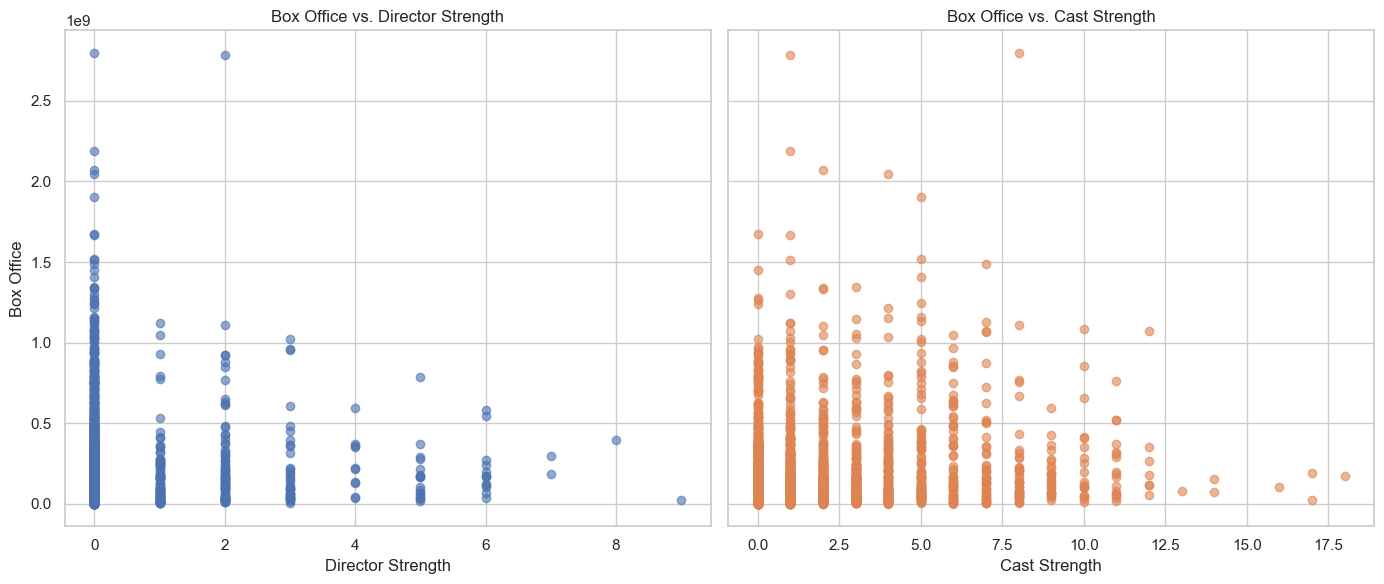

--------------------------------------------------
Correlation and P-value after 1970
Pearson Correlation Coefficient: 0.043
P-value for Director Strength vs. Box Office correlation test: 0.03224201379174098
Pearson Correlation Coefficient: 0.149
P-value for Cast Strength vs. Box Office correlation test: 4.3667850379269335e-14


In [268]:
# Create a 1×2 figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Left: Director Strength
ax1.scatter(
    movies_since_1970['Director Strength'],
    movies_since_1970['Box Office'],
    alpha=0.6
)
ax1.set_xlabel('Director Strength')
ax1.set_ylabel('Box Office')
ax1.set_title('Box Office vs. Director Strength')

# Right: Cast Strength
ax2.scatter(
    movies_since_1970['Cast Strength'],
    movies_since_1970['Box Office'],
    alpha=0.6,
    color='C1'
)
ax2.set_xlabel('Cast Strength')
# no need to set ylabel again since sharey=True
ax2.set_title('Box Office vs. Cast Strength')

plt.tight_layout()
plt.show()


subset = movies_since_1970[['Director Strength', 'Box Office']].dropna()
print('-'*50)
print('Correlation and P-value after 1970')
# Pearson Correlation Test between Director Strength and Total Score
correlation, p_value = stats.pearsonr(subset['Director Strength'], subset['Box Office'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Director Strength vs. Box Office correlation test: {p_value}")

# Drop rows with missing values in the relevant columns
subset2 = movies_since_1970[['Cast Strength', 'Box Office']].dropna()

# Pearson Correlation Test between Runtime and Box Office
correlation, p_value = stats.pearsonr(subset2['Cast Strength'], subset2['Box Office'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value for Cast Strength vs. Box Office correlation test: {p_value}")

#### Key Takeaways:
- We see a somewhat positive relationship for each chart above, with director strength seemingly having a slightly higher correlation. As director strength increases, the range of potential scores gets smaller and smaller, meaning the more prestigous the director is, the more likely the movie is to get a good score.
- **Pearson Correlation:** The Pearson correlation coefficient (0.043, .149) indicates a weak but slightly positive relationship between both director stength and cast strength and total score. Director strength has a weaker relationship with box office than cast strength. 
- **P-value Test:** The p-values for both relationships are extremely small (≈ 0), meaning the correlation is statistically significant well beyond the 0.05 level - we can confidently say there is a real association, regarless of the strength. 
- The scatter plots show a wide spread and a slight downward trend, especially with director strength. This is why it is surprising that there is a positive correlation coefficient.
- overall, relationship remains weak, so we cannot rely on director strength or cast strength alone when predicting box office revenue

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
#movies_clean
# Boxplot on the left for Director Strength
sns.boxplot(
    x='Director Strength',
    y='Box Office',
    data=movies_since_1970,
    palette='vlag',
    ax=ax1
)
ax1.set_xlabel('Director Strength', fontsize=12)
ax1.set_ylabel('Box Office', fontsize=12)
ax1.set_title('Box Office by Director Strength', fontsize=14)

# Boxplot on the right for Cast Strength
sns.boxplot(
    x='Cast Strength',
    y='Box Office',
    data=movies_since_1970,
    palette='vlag',
    ax=ax2
)
ax2.set_xlabel('Cast Strength', fontsize=12)
ax2.set_ylabel('')  # no need to repeat the y-label
ax2.set_title('Box Office by Cast Strength', fontsize=14)

plt.tight_layout()
plt.show()

In [276]:
# 1) Select only the desired columns
columns = ['total score', 'Cast Strength', 'Director Strength', 'Box Office']
movies_clean = movies_clean[columns]
movies_clean

,total score,Cast Strength,Director Strength,Box Office
776,234.0,1,9,23737523.0
85,236.0,6,8,392000694.0
523,251.0,0,7,185770160.0
81,213.0,4,7,294804195.0
1699,204.0,2,6,195243411.0
...,...,...,...,...
887,238.0,1,0,24145613.0
886,209.0,0,0,23936908.0
884,234.0,4,0,19504039.0
883,229.0,0,0,19054534.0


In [278]:
X2 = movies_clean.drop('Box Office', axis = 1).values
y2 = movies_clean['Box Office'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model = LinearRegression()

#Fit model on training data
model.fit(X_train2, y_train2)

#Get r-squared value
r_squared = model.score(X_test2, y_test2)
print('R-Squared Value:',r_squared)

R-Squared Value: 0.013249192394475973


In [280]:
# Compute the tercile bins and assign labels
movies_clean['box_office_level'] = pd.qcut(
    movies_clean['total score'],
    q=3,
    labels=['Bad','Average','Good']
)

# Quick check of the counts in each bucket
movies_clean['box_office_level'].value_counts()
movies_clean

,total score,Cast Strength,Director Strength,Box Office,box_office_level
776,234.0,1,9,23737523.0,Good
85,236.0,6,8,392000694.0,Good
523,251.0,0,7,185770160.0,Good
81,213.0,4,7,294804195.0,Average
1699,204.0,2,6,195243411.0,Average
...,...,...,...,...,...
887,238.0,1,0,24145613.0,Good
886,209.0,0,0,23936908.0,Average
884,234.0,4,0,19504039.0,Good
883,229.0,0,0,19054534.0,Good


In [282]:
bo_sort = movies_clean.drop('total score', axis=1, errors = 'coerrce')
bo_sort = bo_sort[['Cast Strength', 'Director Strength', 'box_office_level']]
bo_sort

,Cast Strength,Director Strength,box_office_level
776,1,9,Good
85,6,8,Good
523,0,7,Good
81,4,7,Average
1699,2,6,Average
...,...,...,...
887,1,0,Good
886,0,0,Average
884,4,0,Good
883,0,0,Good


In [286]:
X4 = bo_sort.drop('box_office_level', axis = 1).values
y4 = bo_sort['box_office_level'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

model3 = LogisticRegression()
model3.fit(X_train4, y_train4)

# Simple linear regression- split good and bad movies
y4_bin = (y4 == 'Good').astype(int)

# Now compute your null deviance
p_null = y4_bin.mean()                      # e.g. 0.3 if 30% are Good
null_probs = np.full_like(y4_bin, p_null)   # array of [0.3,0.3,0.3,…]
null_deviance = log_loss(y4_bin, null_probs)

# And the model’s deviance
model_probs = model3.predict_proba(X4)[:, 1]  # prob of “Good”
deviance      = log_loss(y4_bin, model_probs)

pseudo_r2 = 1 - (deviance / null_deviance)
print(f"Pseudo R^2 = {pseudo_r2:.3f}")

Pseudo R^2 = 0.944


#### Takeaway
- from changing our prediction method to a logistic regression, we determined that there is a very strong correlation between movies with awarded directors and cast and movies considered "good," with a box office in the top 33%

# Text Analytics

In [37]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from collections import Counter

In [39]:
movies

,Title,Oscar Status,Globes Status,Decade Released,Runtime (minutes),Box Office,Genre,Sub-Genre,Studio,Rotten Tomatoes (out of 100),...,Budget,Domestic Gross,Worldwide Gross,Total Gross,Net Gross,remake,Cast Strength,Director Strength,Total Status,total score
0,The Post,1,1,2010-2019,116,174503458.0,Drama,"BioPic & True Story, Journalism","20th Century Studios, Amblin",88.0,...,500000000,819034580,1.797695e+09,2616729150,2116729150,0,18,6,2,243.0
2,Little Women,1,0,2010-2019,135,191540586.0,"Drama, Romance",Romantic Drama,Sony Pictures,95.0,...,420000000,1080959550,2.188384e+09,3269343410,2849343410,1,17,1,1,265.0
4,Joy,0,1,2010-2019,124,101134059.0,Drama,BioPic & True Story,Annapurna Pictures,60.0,...,600000000,564512320,1.011341e+09,1575852910,975852910,0,16,3,1,182.0
5,The Monuments Men,0,0,2010-2019,118,154984035.0,Dramedy,Heist,Sony Pictures,30.0,...,700000000,780316200,1.587027e+09,2367343680,1667343680,0,14,1,0,143.0
6,August: Osage County,0,0,2010-2019,121,74188937.0,Dramedy,Family Dynamics,Lantern Entertainment,66.0,...,250000000,377388100,5.073881e+08,884776200,634776200,0,14,0,0,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,Ghostbusters (2016),0,0,2010-2019,116,229147509.0,Sci-Fi,"Action Comedy, Reboot",Sony Pictures,74.0,...,300000000,2426041850,2.955825e+09,5381866650,5081866650,1,0,0,0,139.2
2791,Take the Lead,0,0,2000-2009,108,65742992.0,Drama,Dance & Music,New Line Cinema,44.0,...,300000000,347420660,6.539049e+08,1001325590,701325590,0,0,0,0,165.0
2792,Last Christmas,0,0,2010-2019,102,121550750.0,RomCom,"Dance & Music, Romantic Drama, Christmas",Universal Pictures,47.0,...,300000000,351507500,1.234294e+09,1585801310,1285801310,0,0,0,0,162.0
2793,The Lost City of Z,0,0,2010-2019,141,8574339.0,Adventure,BioPic & True Story,"Amazon Studios, Bleecker Street",87.0,...,300000000,85743390,1.935808e+08,279324230,-20675770,0,0,0,0,231.0


In [43]:
stopwords_list = set(STOPWORDS)  # start with WordCloud's default stopwords
custom_stopwords = {'The', 'and', 'a'}  # add custom stopwords
stopwords_list.update(custom_stopwords)  # combine the two lists

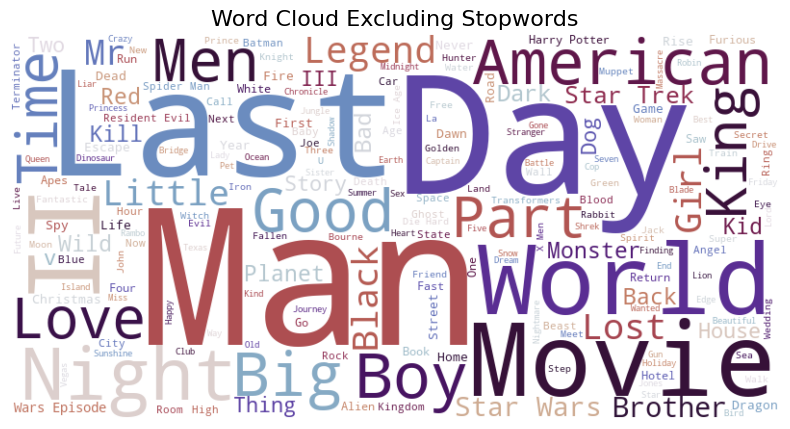

In [45]:
# combine all text for the word cloud
all_text = ' '.join(movies['Title'])

# generate the Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='twilight_shifted',
    stopwords=stopwords_list,
).generate(all_text)

# display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Excluding Stopwords', fontsize=16)
plt.show()

#### Key Takeaway
- The word cloud sizes words by frequency in movie titles (common words like “Last,” “Day,” “Man,” and “World” appear largest).
- Stopwords (e.g. “the,” “and”) are removed so you see the most thematically meaningful terms.
- Visually it highlights dominant title motifs—superhero “Man” films, “Last”/“Day” adventures, and recurring themes around “World,” “Love,” and “Night.”